In [1]:
import numpy as np
import subprocess
import os
import glob
import shutil
import argparse
import yaml
import xarray as xr
import matplotlib.pyplot as plt
from functions import preproc_nemo_T
from functions import moving_average
from functions import dateDecimal
from sklearn.linear_model import LinearRegression

In [4]:
expname1='alef'
dirs1 = {
    'exp': os.path.join("/ec/res4/scratch/itas/ece4", expname1),
    'nemo': os.path.join('/ec/res4/scratch/itas/ece4/', expname1, 'output', 'nemo'),
    'rebuild': "/ec/res4/hpcperm/itas/src/rebuild_nemo"
}
legfile1 = os.path.join(dirs1['exp'], 'leginfo.yml')
with open(legfile1, 'r', encoding='utf-8') as file:
    leginfo1 = yaml.load(file, Loader=yaml.FullLoader)
info1 = leginfo1['base.context']['experiment']['schedule']['leg']
leg1 = info1['num']
#
startyear = 1990
endyear =1995
domain1 = xr.open_dataset(os.path.join(dirs1['exp'], 'domain_cfg.nc'))
vol1 = domain1['e1t']*domain1['e2t']*domain1['e3t_0']
area1 = domain1['e1t']*domain1['e2t']
filelist1 = []
for year in range(startyear, endyear):
    pattern = os.path.join(dirs1['nemo'], f"{expname1}_oce_1m_T_{year}-{year}.nc")
    matching_files = glob.glob(pattern)
    filelist1.extend(matching_files)
data1 = xr.open_mfdataset(filelist1, preprocess=preproc_nemo_T)
tt1 = dateDecimal(data1['time'].values)
#to1 = data1.thetao.weighted(vol1).mean(dim=['z', 'y', 'x'])
#qto1 = data1.qt_oce.weighted(area1).mean(dim=['y', 'x'])
#toi1 = interp_average(tt1, to1, 12)
#qti1 = interp_average(tt1, qto1, 12)
toa1 = moving_average(data1.thetao.weighted(vol1).mean(dim=['z', 'y', 'x']).values.flatten(),12)
#qta1 = moving_average(data1.qt_oce.weighted(area1).mean(dim=['y', 'x']).values.flatten(),12)

In [5]:
data1

<xarray.Dataset>
Dimensions:               (y: 148, x: 180, time: 60, z: 31, axis_nbounds: 2)
Coordinates:
    nav_lat_grid_T        (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    nav_lon_grid_T        (y, x) float32 dask.array<chunksize=(148, 180), meta=np.ndarray>
    time_centered         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 1990-01-16T12:00:00 ... 1994-...
  * z                     (z) float32 -5.0 -15.0 -25.0 ... -4.75e+03 -5.25e+03
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/25)
    deptht_bounds         (time, z, axis_nbounds) float32 dask.array<chunksize=(12, 31, 2), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    e3t                   (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    thetao                (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    so                    (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    ...                    ...
    qt_oce                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sfx                   (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    taum                  (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    windsp                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    precip                (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    snowpre               (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
Attributes:
    name:         output/nemo/alef_oce_1m_T
    description:  ECE4/NEMO T grid variables
    title:        ECE4/NEMO T grid variables
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-02 11:29:16 GMT
    uuid:         881f3faf-cebe-47ee-ac77-a841d2b748e3

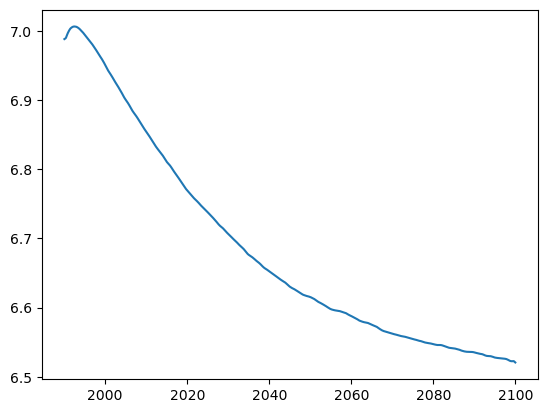

In [3]:
plt.plot(tt1,toa1)

In [8]:
expname2='beta'
dirs2 = {
    'exp': os.path.join("/ec/res4/scratch/itas/ece4", expname2),
    'nemo': os.path.join('/ec/res4/scratch/itas/ece4/', expname2, 'output', 'nemo'),
    'rebuild': "/ec/res4/hpcperm/itas/src/rebuild_nemo"
}
legfile2 = os.path.join(dirs2['exp'], 'leginfo.yml')
with open(legfile2, 'r', encoding='utf-8') as file:
    leginfo2 = yaml.load(file, Loader=yaml.FullLoader)
info2 = leginfo2['base.context']['experiment']['schedule']['leg']
leg2 = info2['num']
#yearspan=10
#endyear = info['start'].year
#startyear = endyear - yearspan
#
startyear = 1990
endyear =1995
domain2 = xr.open_dataset(os.path.join(dirs2['exp'], 'domain_cfg.nc'))
vol2 = domain2['e1t']*domain2['e2t']*domain2['e3t_0']
area2 = domain2['e1t']*domain2['e2t']
filelist2 = []
for year in range(startyear, endyear):
    pattern = os.path.join(dirs2['nemo'], f"{expname2}_oce_1m_T_{year}-{year}.nc")
    matching_files = glob.glob(pattern)
    filelist2.extend(matching_files)
data2 = xr.open_mfdataset(filelist2, preprocess=preproc_nemo_T)
tt2 = data2.time
to2 = data2.thetao.weighted(vol2).mean(dim=['z', 'y', 'x'])
qto2 = data2.qt_oce.weighted(area2).mean(dim=['y', 'x'])
#toi2 = interp_average(tt2, to2, 12)
#qti2 = interp_average(tt2, qto2, 12)
toa2 = moving_average(data2.thetao.weighted(vol2).mean(dim=['z', 'y', 'x']).values.flatten(),12)
qta2 = moving_average(data2.qt_oce.weighted(area2).mean(dim=['y', 'x']).values.flatten(),12)

In [24]:
z1 = data1['z'].values.flatten()
z2 = data2['z'].values.flatten()
z1[21]

-1033.2173

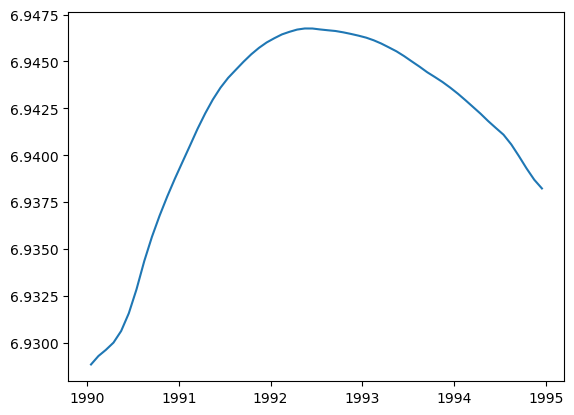

In [8]:
plt.plot(tt2,toa2)
#plt.plot(toa,qta)

In [48]:
Yg = [[toa1[i]] for i in range(len(toa1))]
Xg = [[tt1[i]] for i in range(len(tt1))]
model=LinearRegression()
model.fit(Xg, Yg)
mp = model.coef_[0][0]
qp = model.intercept_[0]
print(mp)
print(qp)
#len(Xg)

-0.003954440151346211
14.820227983362681


In [49]:
Yg1 = [mp*tt1[i]+qp for i in range(len(tt1))]
Yg1

[6.950724153903322,
 6.950404548466432,
 6.950084943029543,
 6.949754503510047,
 6.94942406399055,
 6.949093624471055,
 6.9487631849515585,
 6.94842732839076,
 6.948096888871263,
 6.947766449351767,
 6.947436009832271,
 6.947105570312775,
 6.9467697137519755,
 6.946450108315086,
 6.946130502878197,
 6.945800063358701,
 6.945469623839204,
 6.945139184319708,
 6.944808744800213,
 6.944472888239413,
 6.9441424487199175,
 6.94381200920042,
 6.943481569680925,
 6.9431511301614295,
 6.942815732421068,
 6.942491597982434,
 6.9421674635437975,
 6.941837926864519,
 6.94150839018524,
 6.941178853505961,
 6.940849316826682,
 6.94051437790676,
 6.940184841227481,
 6.939855304548202,
 6.939525767868924,
 6.939196231189644,
 6.938860833449283,
 6.938541228012394,
 6.9382216225755045,
 6.937891183056008,
 6.937560743536512,
 6.9372303040170165,
 6.93689986449752,
 6.93656400793672,
 6.936233568417225,
 6.935903128897728,
 6.935572689378232,
 6.935242249858737,
 6.934906393297937,
 6.934586787861048,


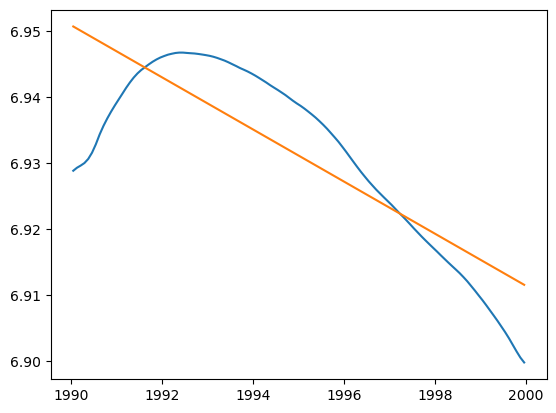

In [50]:
plt.plot(tt1,toa1)
plt.plot(tt1,Yg1)